In [1]:
import pandas as pd

In [2]:
#Leitura de arquivos
df1 = pd.read_excel('./datasets/Aracaju.xlsx')
df2 = pd.read_excel('./datasets/Fortaleza.xlsx')
df3 = pd.read_excel('./datasets/Natal.xlsx')
df4 = pd.read_excel('./datasets/Recife.xlsx')
df5 = pd.read_excel('./datasets/Salvador.xlsx')

In [3]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [4]:
#JUntar as Planilhas
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
#Pega uma amostragem dos dados, no caso ele pega diferentes partes da tabela e apresenta
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
65,Natal,2019-04-05,292.00,852,2
30,Recife,2019-01-01,12.35,980,5
6,Aracaju,2018-01-01,35.50,1522,2
62,Aracaju,2018-01-01,28.66,1520,3
16,Recife,2019-01-01,19.95,980,8


In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
#Alterar o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')


In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
#Soma os valores nulos e retorna a soma
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
#Aqui eu estou substituindo os valos nulos da tabela pela média, e usando o inplace=True para mudar isso no arquivo origem
# sem isso o resultado aparecerá sem os nulos mas o na memoria o arquivo continuará sem mudança
df['Vendas'].fillna(df['Vendas'].mean, inplace=True)

In [13]:
#Aqui eu já estou substituindo os valores nulos por 0
df['Vendas'].fillna(0, inplace=True)

In [14]:
#apagando Valores nulos
df.dropna(inplace=True)

In [15]:
#Aqui estou apagando, mas so as linhas onde a coluna Vendas estiverem nulas, se por exemplo a cidade for nula esta linha não será apagada 
df.dropna(subset=['Vendas'],inplace=True)

In [16]:
#Aqui eu estou apagando a linha onde todos os valores das colunas estijam nulos, no caso se existir cidade nulo vendas nulo id nulo
#apegue a linha 
df.dropna(how='all',inplace=True)

In [17]:
#Criando uma nova coluna
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [18]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [20]:
# df = df.drop(columns=['Recaita'])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Maior Receita
df['Receita'].max()

3544.0

In [ ]:
df['Receita'].min()

3.34

In [ ]:
#3 maiores Receitas
df.nlargest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#3 menores receitas
df.nsmallest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
#Somar as receitas de cada cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando as receitas do maior para o menor
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [ ]:
df['Data'] = df['Data'].astype('int64')

In [ ]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [ ]:
#Transformar coluna data em data
df['Data']= pd.to_datetime(df['Data'])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Agrupar por ano, determinar a receita em um periodo
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando a nova coluna Ano a partir da coluna data
df['Ano_Vendas'] = df['Data'].dt.year

In [ ]:
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018
5,Aracaju,2018-01-01,156.20,1522,1,156.20,2018
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2018
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas
59,Natal,2018-01-15,369.00,853,2,738.00,2018
135,Natal,2019-01-02,9.95,1037,3,29.85,2019
157,Natal,2019-01-02,150.17,1036,2,300.34,2019
104,Aracaju,2018-01-01,46.96,1522,1,46.96,2018
26,Recife,2019-01-01,126.05,980,1,126.05,2019


In [ ]:
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_venda,dia_venda
11,Recife,2019-01-01,202.79,980,5,1013.95,2019,1,1
83,Natal,2019-01-02,63.66,1036,2,127.32,2019,1,2
78,Fortaleza,2019-01-01,37.66,1005,2,75.32,2019,1,1
187,Salvador,2019-01-02,3.85,1035,3,11.55,2019,1,2
38,Aracaju,2018-01-01,142.46,1520,1,142.46,2018,1,1
117,Salvador,2019-03-02,39.41,1034,1,39.41,2019,3,2
212,Natal,2019-01-02,50.73,1037,3,152.19,2019,1,2
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1
28,Aracaju,2018-01-01,114.93,1520,5,574.65,2018,1,1
7,Recife,2019-02-11,33.37,982,3,100.11,2019,2,11


In [ ]:
#data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calcular a diferença de dias
df['diferenca_dias'] = df['Data']  - df['Data'].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_venda,dia_venda,diferenca_dias
27,Recife,2019-01-01,22.25,980,7,155.75,2019,1,1,365 days
135,Fortaleza,2019-03-02,10.79,983,5,53.95,2019,3,2,425 days
179,Salvador,2019-01-02,64.95,1036,1,64.95,2019,1,2,366 days
43,Fortaleza,2019-01-01,191.52,1004,1,191.52,2019,1,1,365 days
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days


In [ ]:
#Coluna de Trimestre
df['trimestre_venda'] = df['Data'].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_venda,dia_venda,diferenca_dias,trimestre_venda
1,Natal,2018-11-25,563.00,853,2,1126.00,2018,11,25,328 days,4
74,Fortaleza,2019-01-01,163.09,1005,5,815.45,2019,1,1,365 days,1
136,Recife,2019-03-02,39.09,982,4,156.36,2019,3,2,425 days,1
173,Salvador,2019-01-02,31.77,1034,2,63.54,2019,1,2,366 days,1
22,Aracaju,2018-01-01,150.94,1522,1,150.94,2018,1,1,0 days,1


In [ ]:
#Filtrar vendes de um determinado mês de um ano
venda_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
venda_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [ ]:
venda_marco_19.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_venda,dia_venda,diferenca_dias,trimestre_venda
82,Natal,2019-03-07,868.00,854,3,2604.00,2019,3,7,430 days,1
112,Salvador,2019-03-02,43.00,1036,3,129.00,2019,3,2,425 days,1
125,Recife,2019-03-02,37.60,983,4,150.40,2019,3,2,425 days,1
108,Salvador,2019-03-02,11.72,1037,1,11.72,2019,3,2,425 days,1
126,Salvador,2019-03-02,41.69,1036,2,83.38,2019,3,2,425 days,1
135,Salvador,2019-03-02,9.95,1037,3,29.85,2019,3,2,425 days,1
7,Natal,2019-03-18,886.00,853,4,3544.00,2019,3,18,441 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
131,Recife,2019-03-02,139.07,982,6,834.42,2019,3,2,425 days,1
139,Fortaleza,2019-03-02,141.16,980,7,988.12,2019,3,2,425 days,1


In [ ]:
#Verifica quantas linhas casa lojaId possui, neste primeiro caso a lojaID 1036 tem 117 linhas, sendo assim nesta tabela
#que se refere a vendas esta loja possui 117 vendas/ ascending = False <- do maior para o menor, mas isso jé vem default
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot: >

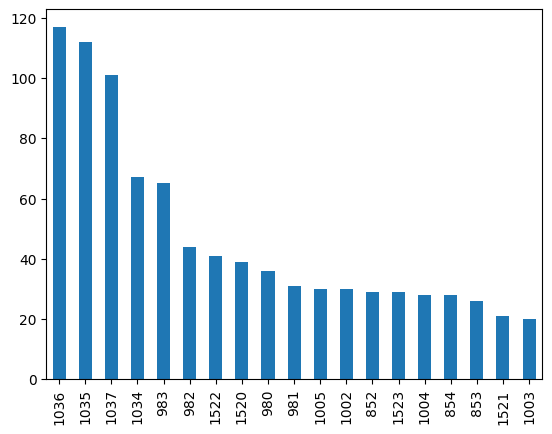

In [ ]:
#Grafico de barras verticais .plot.bar
df['LojaID'].value_counts(ascending=False).plot.bar()

<AxesSubplot: >

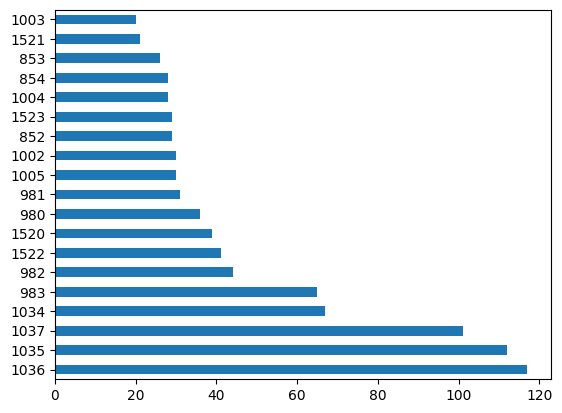

In [ ]:
#Barra horizontal
df['LojaID'].value_counts().plot.barh()

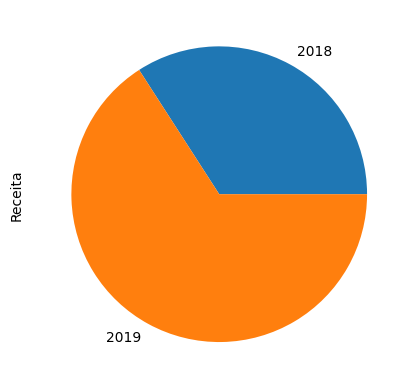

In [ ]:
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [ ]:
df.groupby(df['Ano_Vendas'])['Receita'].sum()

Ano_Vendas
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

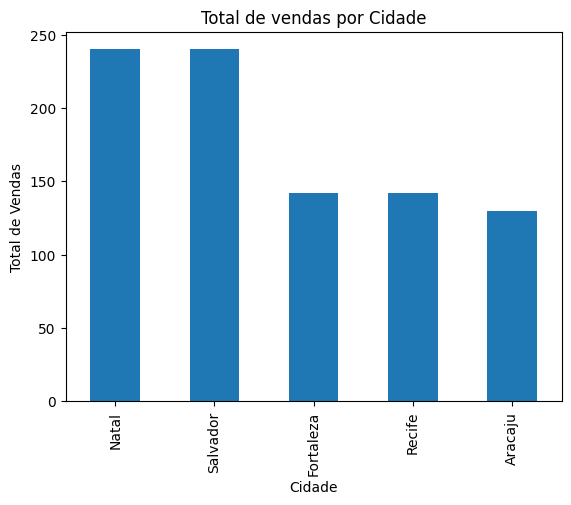

In [ ]:
#Adicionar Titulos e ir alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title="Total de vendas por Cidade")
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas');

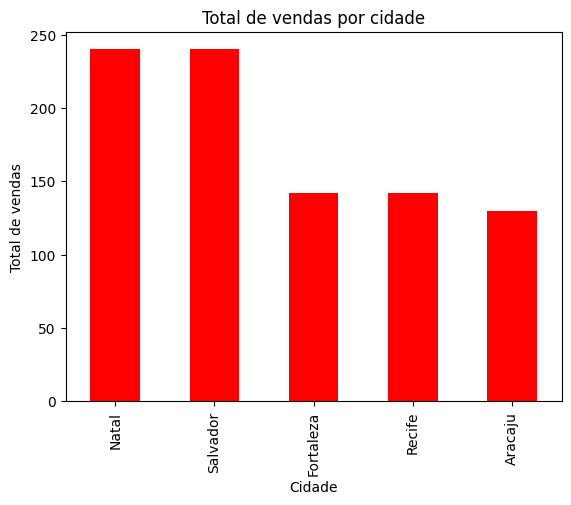

In [ ]:
#Troca as cores do grafico
df['Cidade'].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel('Cidade')
plt.ylabel('Total de vendas');

In [ ]:
#alterar tipo
plt.style.use('ggplot')

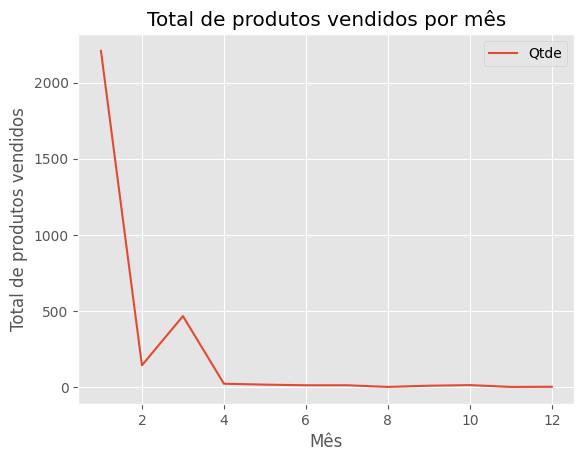

In [ ]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title="Total de produtos vendidos por mês")
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend();

In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_venda,dia_venda,diferenca_dias,trimestre_venda
97,Salvador,2019-01-01,39.91,1037,3,119.73,2019,1,1,365 days,1
73,Recife,2019-01-01,39.71,981,5,198.55,2019,1,1,365 days,1
33,Salvador,2019-01-01,144.19,1035,2,288.38,2019,1,1,365 days,1
80,Aracaju,2018-01-01,121.77,1523,3,365.31,2018,1,1,0 days,1
44,Salvador,2019-01-01,43.26,1037,2,86.52,2019,1,1,365 days,1
160,Salvador,2019-01-02,11.76,1034,1,11.76,2019,1,2,366 days,1
177,Salvador,2019-01-02,41.19,1037,2,82.38,2019,1,2,366 days,1
83,Fortaleza,2019-01-01,3.88,1002,6,23.28,2019,1,1,365 days,1
97,Aracaju,2018-01-01,32.69,1521,5,163.45,2018,1,1,0 days,1
2,Salvador,2019-02-10,173.59,1035,3,520.77,2019,2,10,405 days,1


In [ ]:
#Selecionar vendas so do ano de 2019
df_2019 = df[df['Ano_Vendas'] == 2019]

In [ ]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

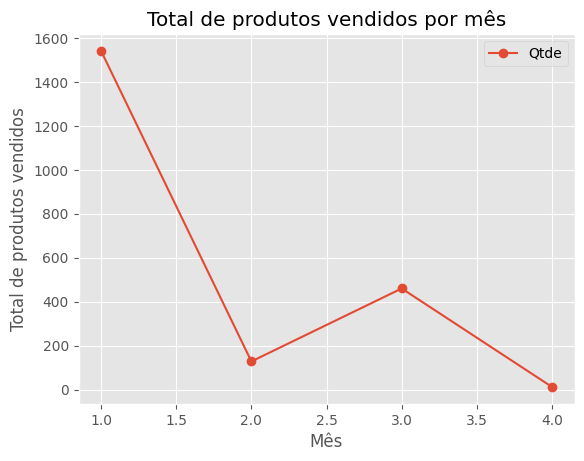

In [ ]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='o', title="Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

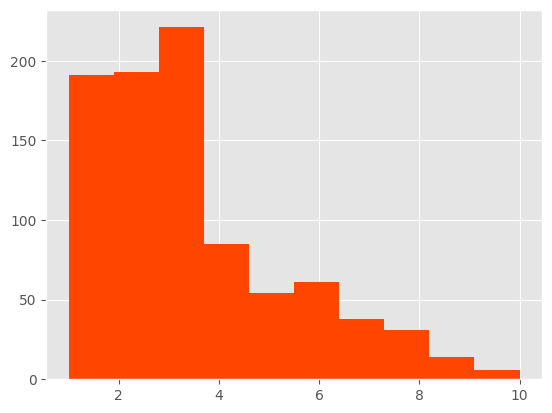

In [ ]:
#Histograma
plt.hist(df['Qtde'],color='orangered');

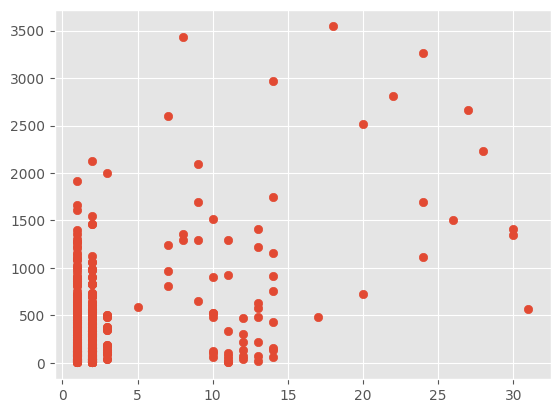

In [ ]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita']);

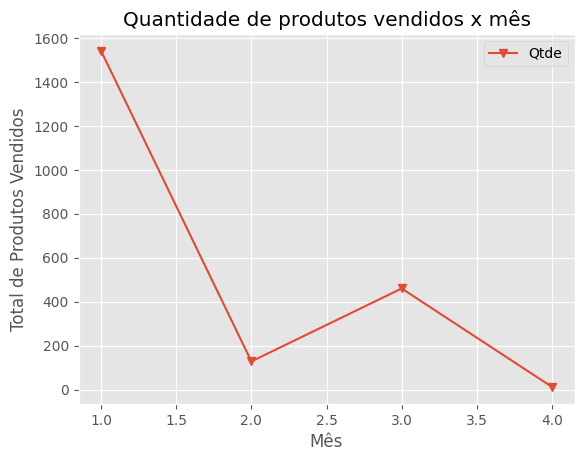

In [ ]:
#Salvando img
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='v')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend()
plt.savefig('grafico QTDE x MES.png')